<a href="https://colab.research.google.com/github/bhakti-1304/Map_Plot_Using_Geopandas.github.io/blob/main/Map_Plot_Using_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


In [7]:
df = pd.read_csv('/content/c3.csv')

In [11]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize the geolocator
geolocator = Nominatim(user_agent="city_coordinates_fetcher")

# Function to fetch coordinates
def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Load your dataset
df = pd.read_csv("/content/c3.csv")  # Replace with the actual path of your file

# Create empty lists for Latitude and Longitude
latitude = []
longitude = []

# Loop through each city and fetch coordinates
for city in df['Location']:
    lat, lon = get_coordinates(city)
    latitude.append(lat)
    longitude.append(lon)

# Add the coordinates to the dataframe
df['Latitude'] = latitude
df['Longitude'] = longitude

# Save the updated dataset
df.to_csv("c3_with_coordinates.csv", index=False)

print("Coordinates fetched and saved successfully!")


Coordinates fetched and saved successfully!


In [12]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
data = df.iloc[:,:1]
gf = gpd.GeoDataFrame(df,  geometry=geometry)

In [13]:
gf.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,Location,Latitude,Longitude,geometry
0,Ahilyanagar,19.092952,74.749345,POINT (74.74935 19.09295)
1,Akola,20.761812,77.192116,POINT (77.19212 20.76181)
2,Amravati,21.154541,77.644296,POINT (77.6443 21.15454)
3,Chhatrapati SambhajiNagar,19.877263,75.339024,POINT (75.33902 19.87726)
4,Beed,18.991844,75.909784,POINT (75.90978 18.99184)


In [14]:
import zipfile
with zipfile.ZipFile('/content/maharashtra_district.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


<Axes: >

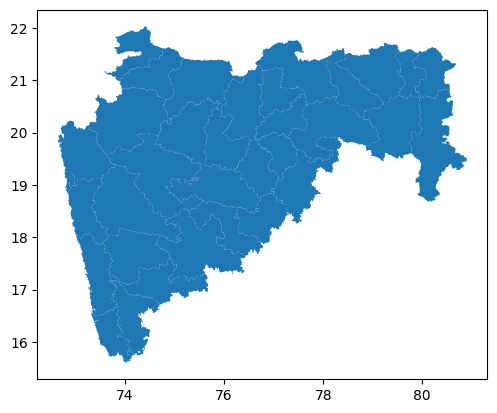

In [17]:
import geopandas as gpd
mah_map = gpd.read_file('/content/maharashtra_district.shp')
mah_map.plot()


In [ ]:
mah_map.plot(column='Location',legend=True,cmap='jet')

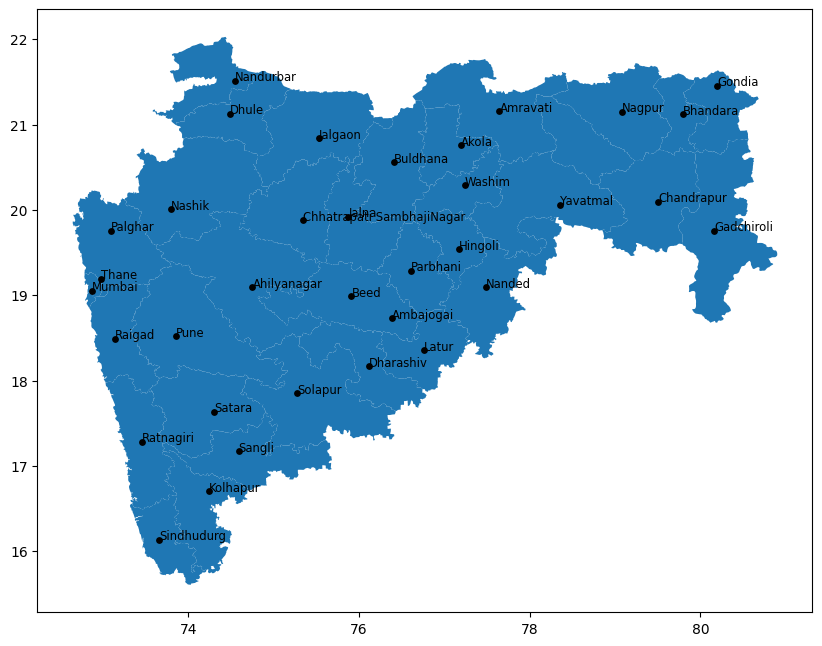

In [19]:
gf.plot(ax=mah_map.plot(figsize=(10,15)), marker='o', color='black', markersize=15, legend=True)
for t,x,y in zip(df.Location,df.Longitude,df.Latitude):
    plt.text(x,y,t,size='small')


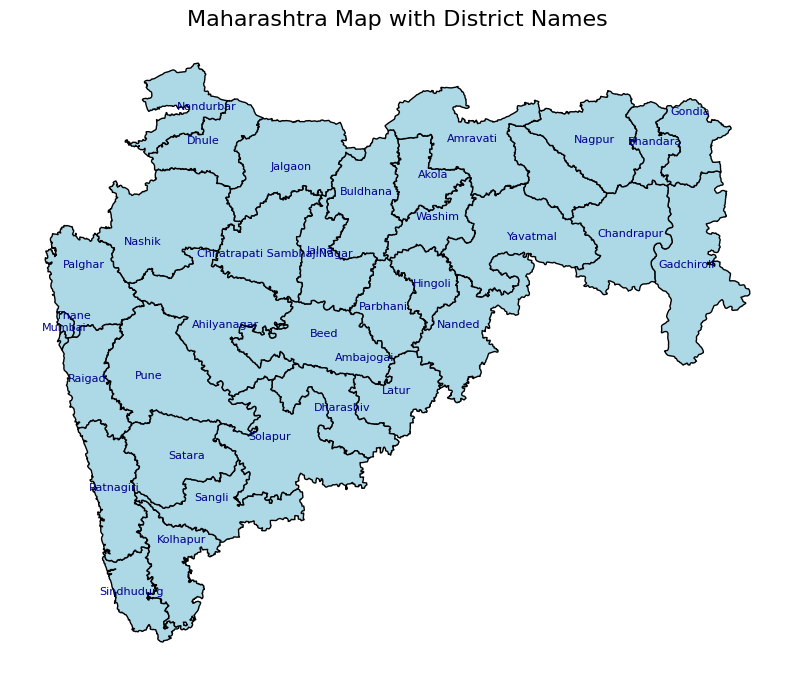

In [21]:
# Plot the map with lighter color for districts
fig, ax = plt.subplots(figsize=(10, 10))
mah_map.plot(ax=ax, edgecolor='black', color='lightblue')  # Use a light blue color for districts

# Add district names in the center of each district
for x, y, label in zip(gf.geometry.centroid.x,
                       gf.geometry.centroid.y,
                       gf['Location']):  # Replace 'District' with the column name for district names
    ax.text(x, y, label, fontsize=8, ha='center', color='darkblue')  # Customize font size and color

# Set title and remove axis
ax.set_title('Maharashtra Map with District Names', fontsize=16)
ax.axis('off')

plt.show()


In [23]:
pip install adjustText

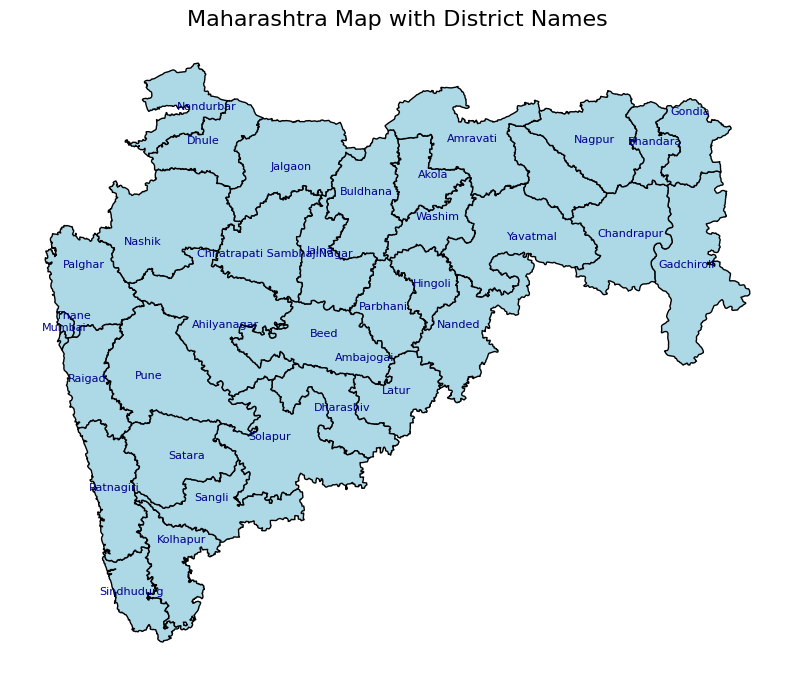

In [41]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(10, 15))
mah_map.plot(ax=ax, edgecolor='black', color='lightblue')

# Add district names with automatic adjustment
texts = []
for x, y, label in zip(gf.geometry.centroid.x,
                       gf.geometry.centroid.y,
                       gf['Location']):
    texts.append(ax.text(x, y, label, fontsize=8, ha='center', color='darkblue'))

# Automatically adjust text positions to avoid overlap
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Set title and remove axis
ax.set_title('Maharashtra Map with District Names', fontsize=16)
ax.axis('off')

plt.show()


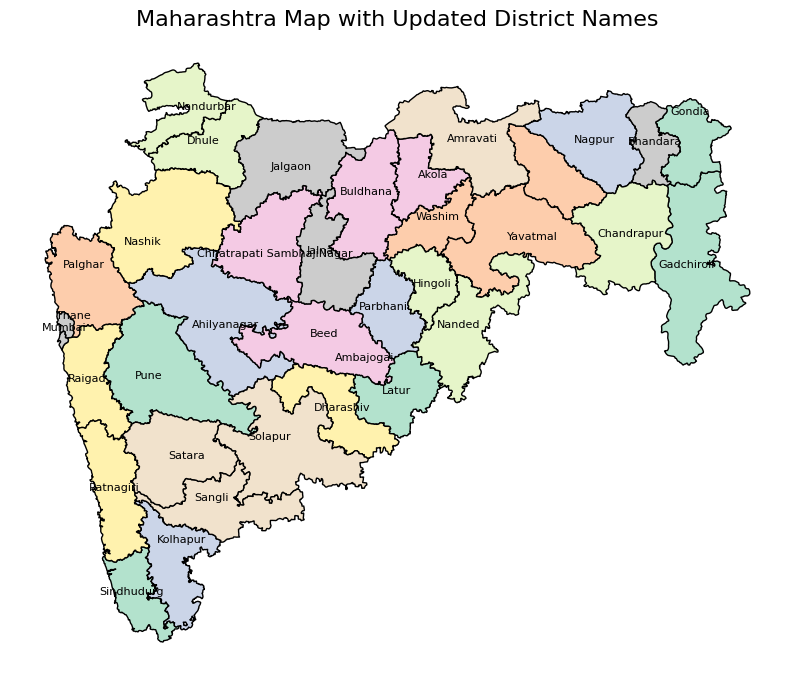

In [53]:
from adjustText import adjust_text


fig, ax = plt.subplots(figsize=(10, 15))
mah_map.plot(ax=ax, edgecolor='black', cmap='Pastel2')

# Add district names with automatic adjustment
texts = []
for x, y, label in zip(gf.geometry.centroid.x,
                       gf.geometry.centroid.y,
                       gf['Location']):
    texts.append(ax.text(x, y, label, fontsize=8, ha='center', color='black'))

# Automatically adjust text positions to avoid overlap
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Set title and remove axis
ax.set_title('Maharashtra Map with Updated District Names', fontsize=16)
ax.axis('off')

plt.show()
